In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os

In [3]:
#eu deveria vasculhar todas as pastas e comparar os resultados do do hcac e hcac-ml com bow e embeddings
#tem uma pasta para cada dataset que segue a organização dataset/tipo_de_embedding/metodo/ ou dataset/bow
#os graficos devem apresentar os resultados dos algoritmos hcac e hcac-ml para cada tipo de embedding e bow
#os graficos podem ser organizados de acordo com o tipo de embedding


In [4]:
#valores para percorrer os resultados
algorithms = ["hcac", "hcac_ml"]
datasets = ["eleicao"]
methods = ["std", "no_stopwords"]
embeddings =["skip_s50", "skip_s100"]

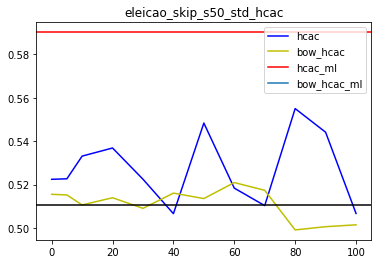

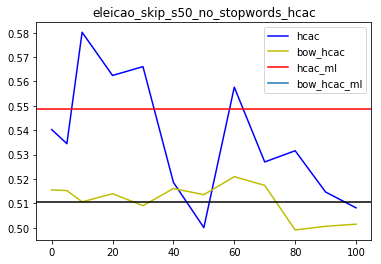

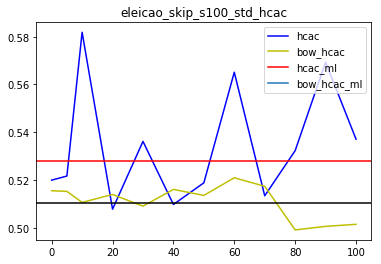

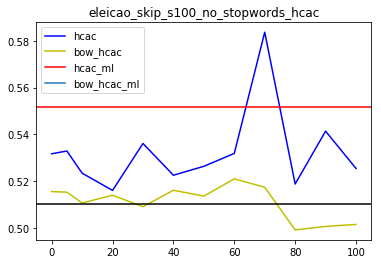

In [13]:
#esse bloco é responsável por percorrer as pastas verificando os arquivos com o fscore e guardando os valores
results = []
res = {}
for dataset in datasets:
    for alg in algorithms:
        key = dataset+"_bow_no_stopwords_"+alg
        res[key] = []
        filename = alg + "_fscore_"+dataset+".csv"
        res_path = os.path.join("..", "results", dataset, "bow", "no_stopwords", filename)
        file = open(res_path, "r")
        for line in file:
            res[key].append([float(line.split(';')[0]),float(line.split(';')[1])])

for dataset in datasets:
    for emb in embeddings:
        for method in methods:
            for alg in algorithms:
                key = dataset+"_"+emb+"_"+method+"_"+alg
                res[key] = []
                title = dataset+"_"+method+"_"
                filename = alg + "_fscore_"+dataset+".csv"
                res_path = os.path.join("..", "results", dataset, emb, method, filename)
                
                file = open(res_path, "r")
                for line in file:
                    res[key].append([float(line.split(';')[0]),float(line.split(';')[1])])
                if(alg == "hcac_ml"):
                    #plotando resultado do hcac_ml com embeddings
                    x = np.array(res[key])[:,1][np.argmax(np.array(res[key])[:,0])]
                    y = np.max(np.array(res[key])[:,1])
                    plt.axhline(y=y, color='r', linestyle='-') 
                    plt.plot(x,y, 'r',label="hcac_ml")
                    
                    # plotando resultado do hcac_ml com bow
                    y = np.max(np.array(res[dataset+"_bow_no_stopwords_"+alg])[:,1])
                    plt.axhline(y=y, color='k', linestyle='-')
                    x = np.array(res[key])[:,1][np.argmax(np.array(res[key])[:,0])]
                    plt.plot(x,y,label="bow_hcac_ml")

                else:
                    #plotando resultado do hcac com embeddings
                    x = np.array(res[key])[:,0]
                    y = np.array(res[key])[:,1]
                    plt.title(key)
                    plt.plot(x,y, 'b', label="hcac")
                    
                    # plotando resultado do hcac com bow
                    y = np.array(res[dataset+"_bow_no_stopwords_"+alg])[:,1]
                    x = np.array(res[key])[:,0]
                    plt.plot(x,y, 'y', label="bow_hcac")
            plt.legend()       
            plt.show()